In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import HTML

In [2]:
%reset -f

In [3]:
import pandas as pd

# Path to your Excel file
file_path = 'Run1.xlsx'
sheet = 'Run1'
# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify
print(df.head())



                 Time     PRE  TEMP EXT  TEMP_CULTURE  PAR_LIGHT    PH     DO  \
0 2024-03-27 13:12:00  118.75      20.7          27.0       12.5  8.80  23.57   
1 2024-03-27 13:22:00  118.75      20.7          27.4       12.5  8.83  23.57   
2 2024-03-27 13:32:00  118.75      20.7          27.8       12.5  7.19  23.35   
3 2024-03-27 13:42:00  118.75      20.7          28.1       12.5  7.01  23.87   
4 2024-03-27 13:52:00  118.75      20.7          27.9       12.5  7.20  23.96   

     OD       DRY       CELL  VES  DES  Surface Tension  
0  0.55  0.191455  281000000    0    0                0  
1  0.58  0.201898  297000000    0    0                0  
2  0.62  0.215822  317000000    0    0                0  
3  0.64  0.222784  327000000    0    0                0  
4  0.66  0.229746  337000000    0    0                0  


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


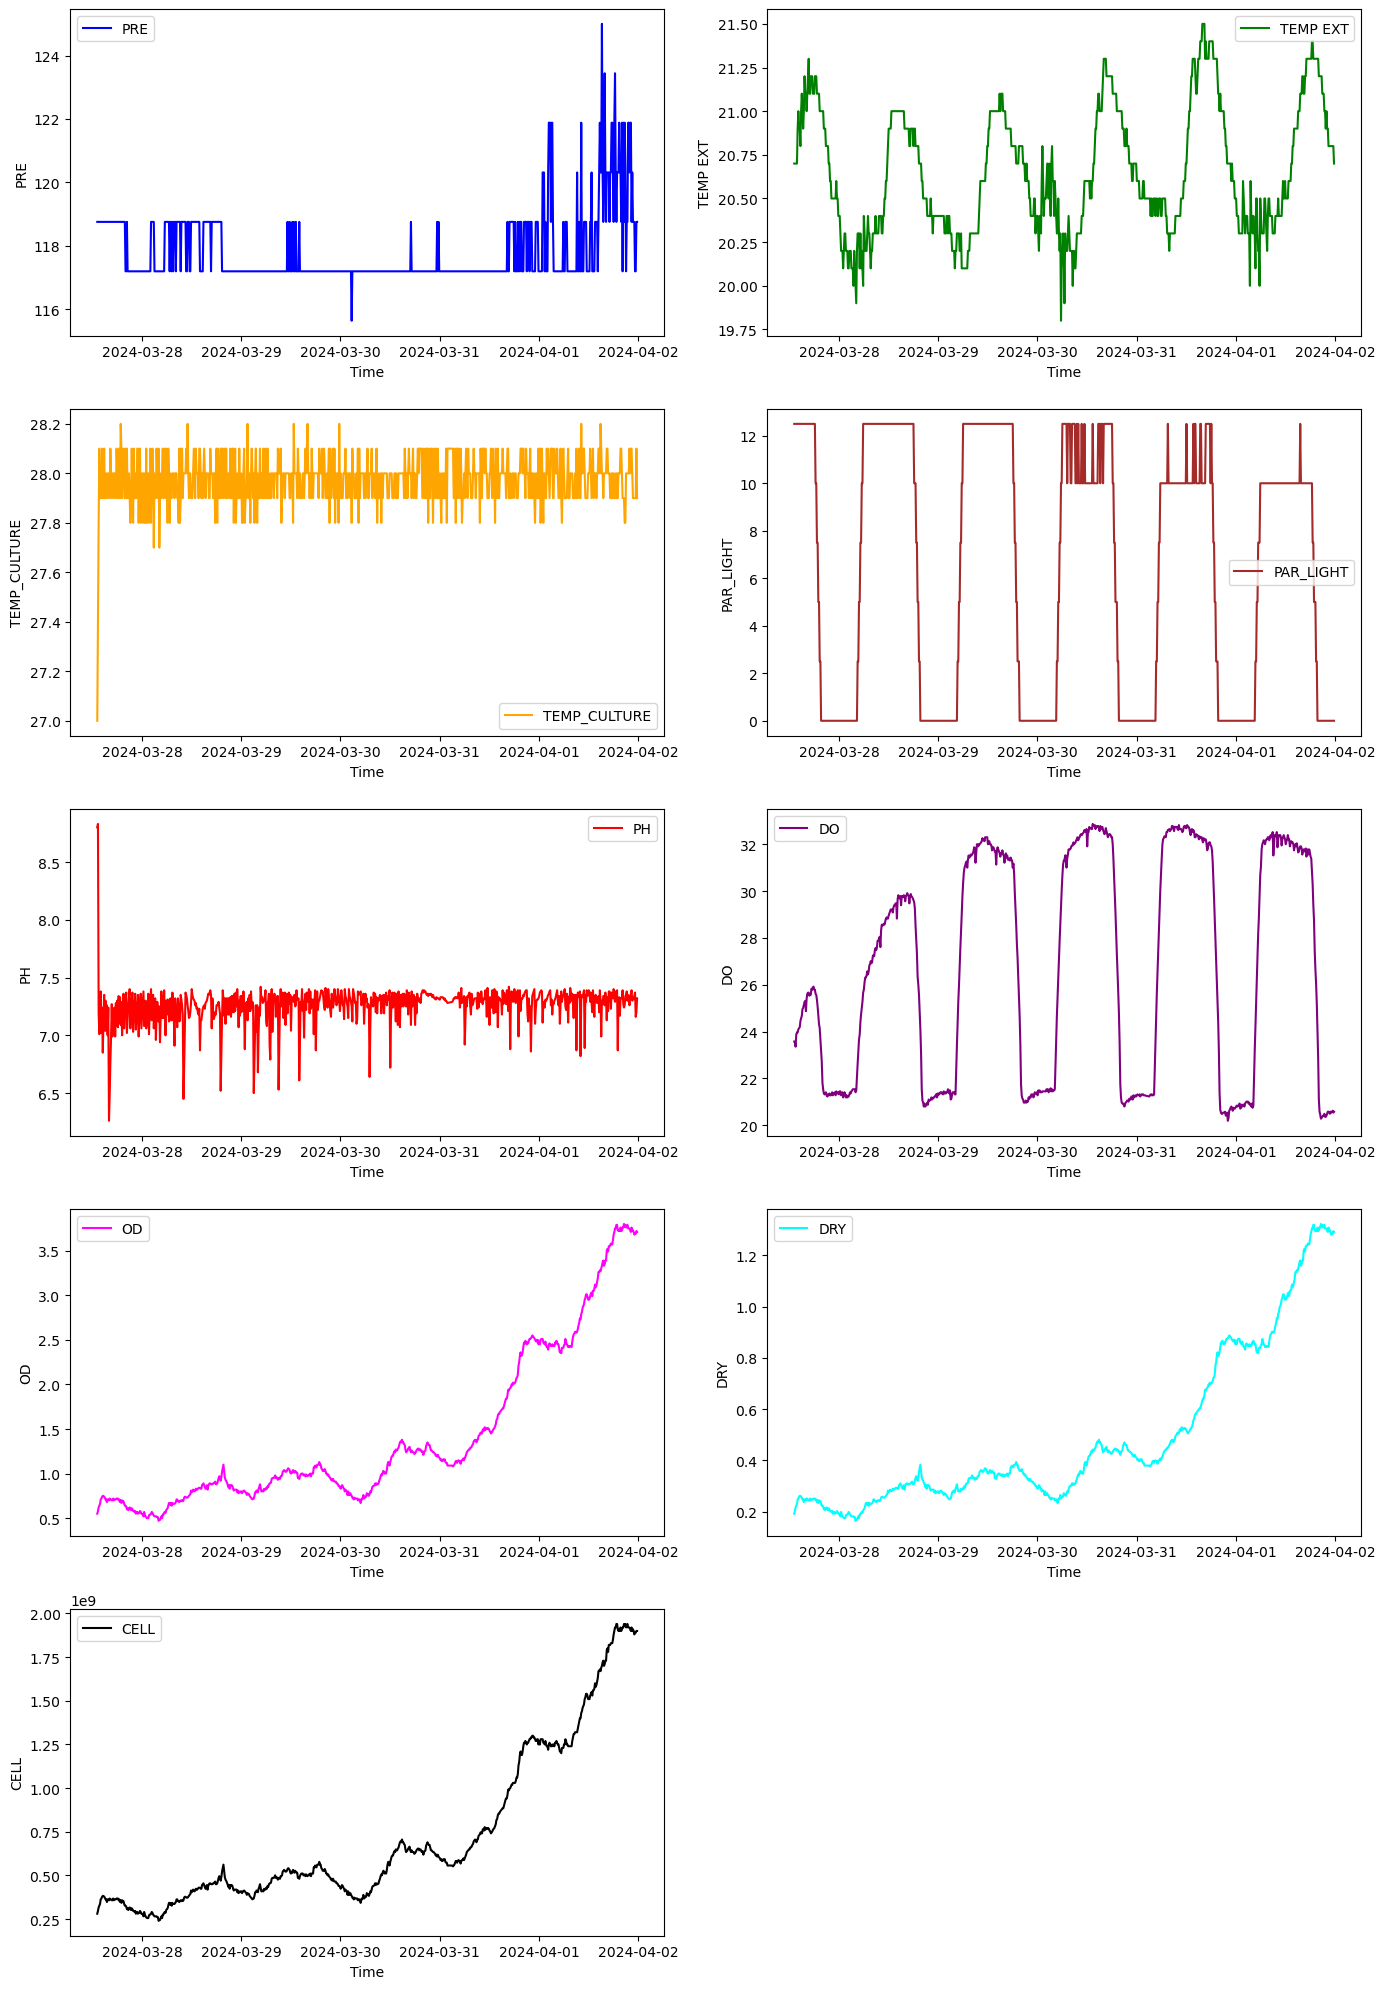

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating subplots with 5 rows and 2 columns
fig, axs = plt.subplots(5, 2, figsize=(14, 20))  # 5 rows, 2 columns

# Flatten the 2D array of axes to easily iterate through them
axs = axs.flatten()

# List of columns to plot
columns = ['PRE', 'TEMP EXT', 'TEMP_CULTURE', 'PAR_LIGHT', 'PH', 'DO', 'OD', 'DRY', 'CELL']

# List of colors for each plot
colors = ['blue', 'green', 'orange', 'brown', 'red', 'purple', 'magenta', 'cyan', 'black']

# Plotting each column against 'Time'
for i, (column, color) in enumerate(zip(columns, colors)):
    axs[i].plot(df['Time'], df[column], label=column, color=color)
    axs[i].set_ylabel(column)
    axs[i].set_xlabel('Time')
    axs[i].legend()

# Remove the last subplot (9th subplot in a 10 plot layout)
fig.delaxes(axs[-1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
import datetime

# Assuming df is your DataFrame with the 'Time' column
# If 'Time' is not already in datetime format, convert it
df['Time'] = pd.to_datetime(df['Time'])

start_time = datetime.datetime(2024, 3, 1)
end_time = datetime.datetime(2024, 4, 20)

# Filter the DataFrame based on 'Time' between start_time and end_time
dft = df.loc[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# Now dft contains the rows with 'Time' between start_time and end_time
print(dft)


                       Time     PRE  TEMP EXT  TEMP_CULTURE  PAR_LIGHT    PH  \
0   2024-03-27 13:12:00.000  118.75      20.7          27.0       12.5  8.80   
1   2024-03-27 13:22:00.000  118.75      20.7          27.4       12.5  8.83   
2   2024-03-27 13:32:00.000  118.75      20.7          27.8       12.5  7.19   
3   2024-03-27 13:42:00.000  118.75      20.7          28.1       12.5  7.01   
4   2024-03-27 13:52:00.000  118.75      20.7          27.9       12.5  7.20   
..                      ...     ...       ...           ...        ...   ...   
773 2024-04-01 23:02:10.775  118.75      20.8          27.9        0.0  7.34   
774 2024-04-01 23:12:11.265  117.19      20.8          27.9        0.0  7.37   
775 2024-04-01 23:22:11.755  117.19      20.8          27.9        0.0  7.16   
776 2024-04-01 23:32:12.245  118.75      20.8          28.1        0.0  7.20   
777 2024-04-01 23:42:12.735  118.75      20.7          27.9        0.0  7.32   

        DO    OD       DRY        CELL 

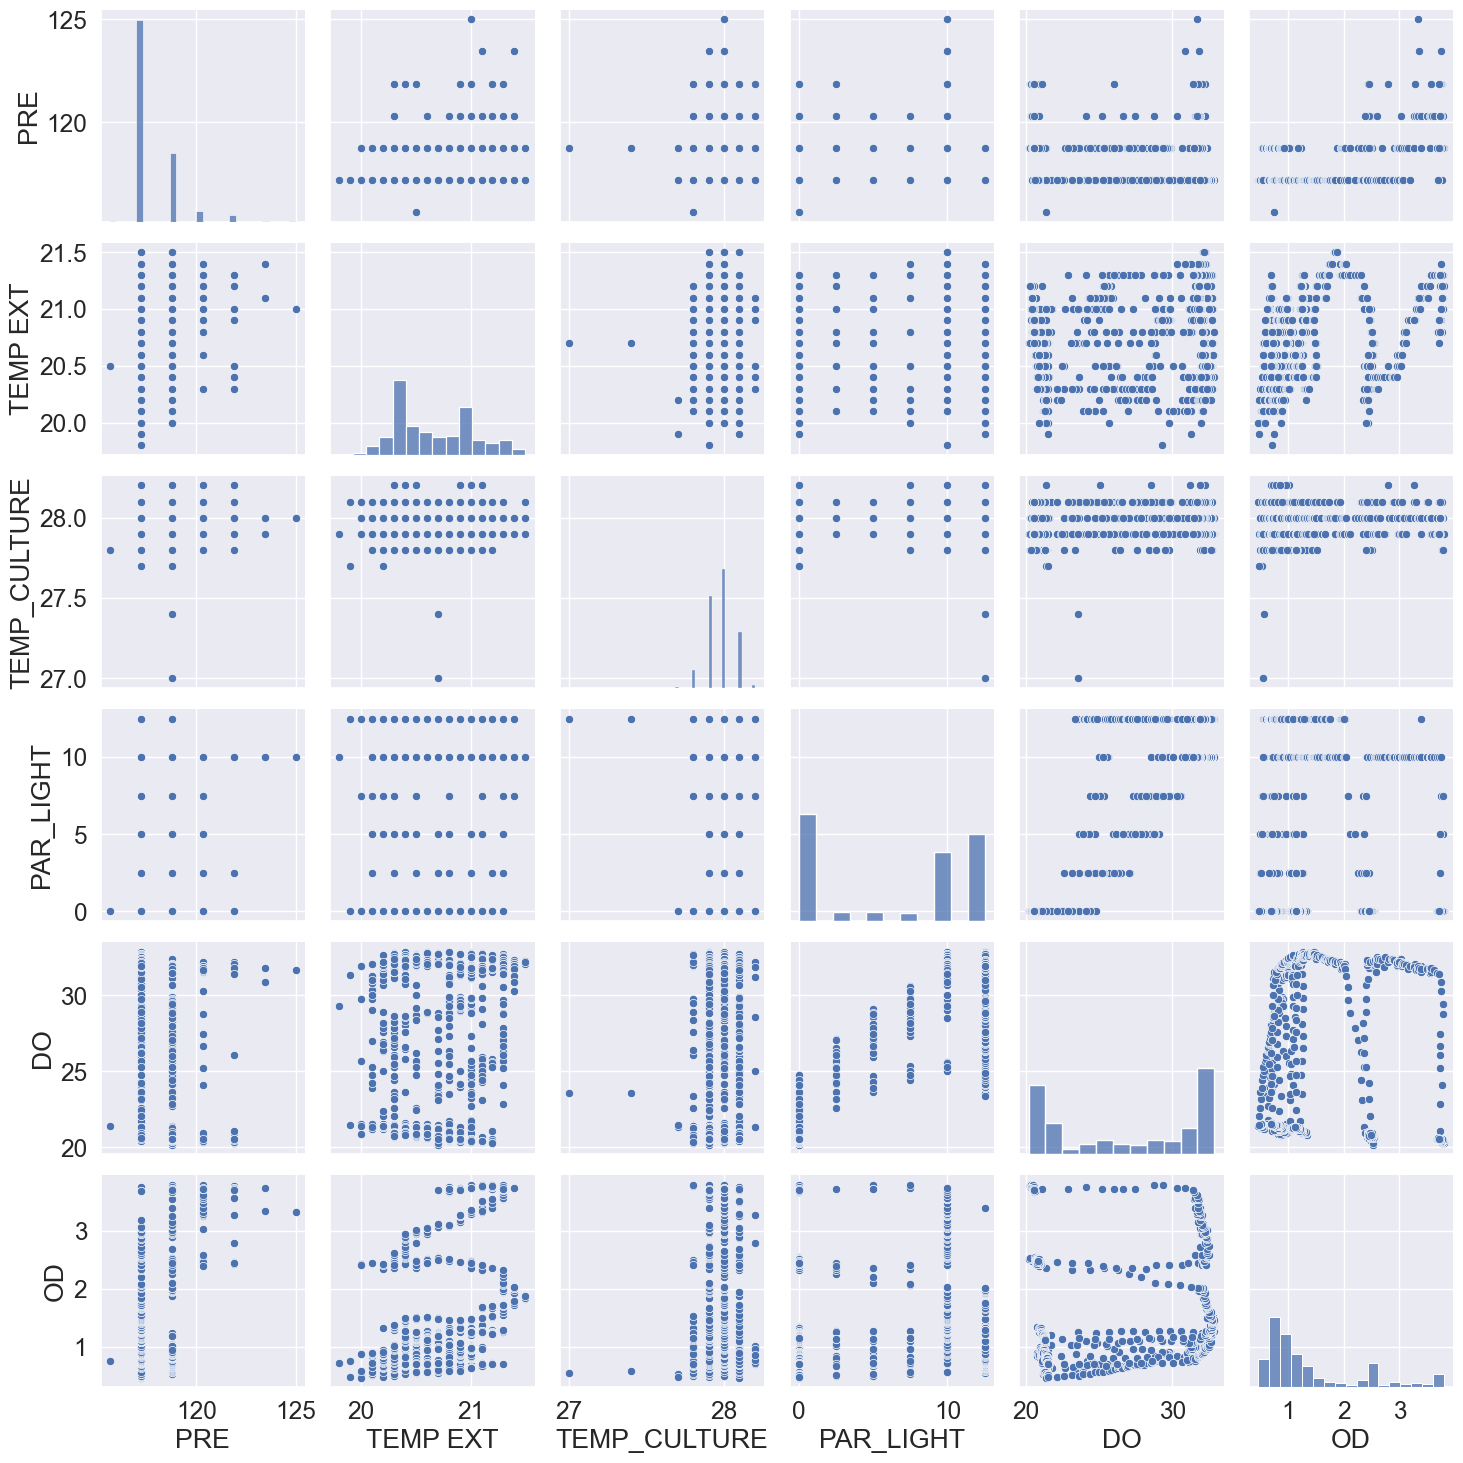

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'Time' column
# Drop the 'Time' column
dftw = dft.drop(columns=['Time','VES','DES','Surface Tension','DRY','CELL','PH'])
sns.set(font_scale=1.6)  # Adjust the font scale as needed
# Create a pairplot
sns.pairplot(dftw)
plt.show()


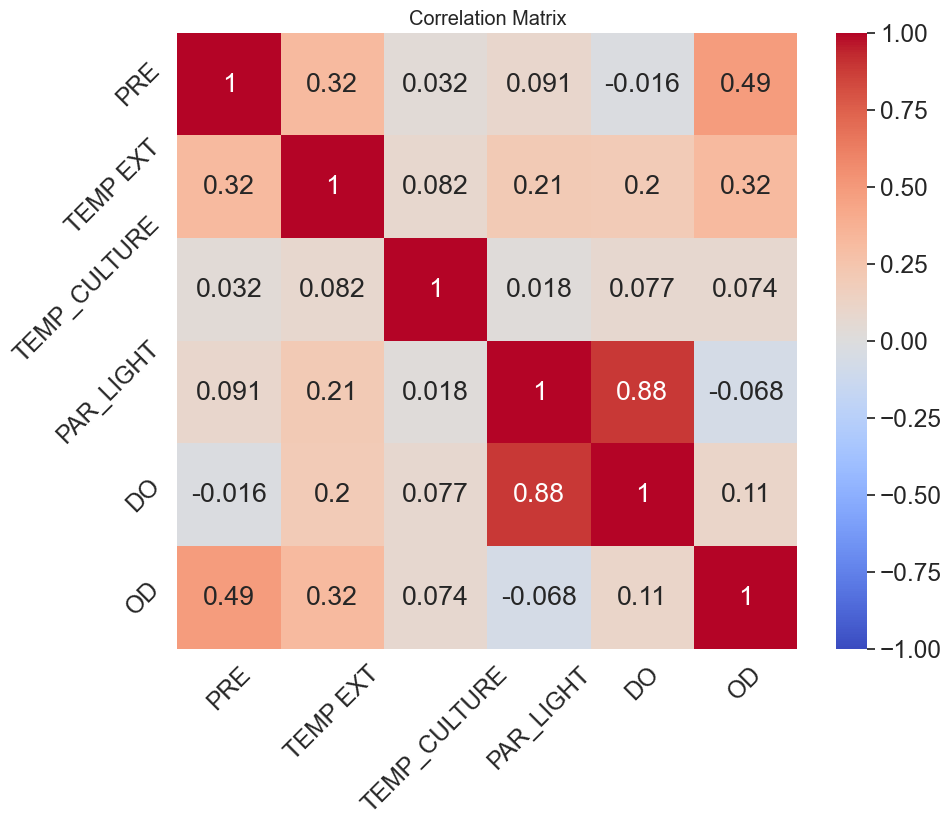

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_without_time is your DataFrame without the 'Time' column
# Calculate the correlation matrix
correlation_matrix = dftw.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.set(font_scale=1.2)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


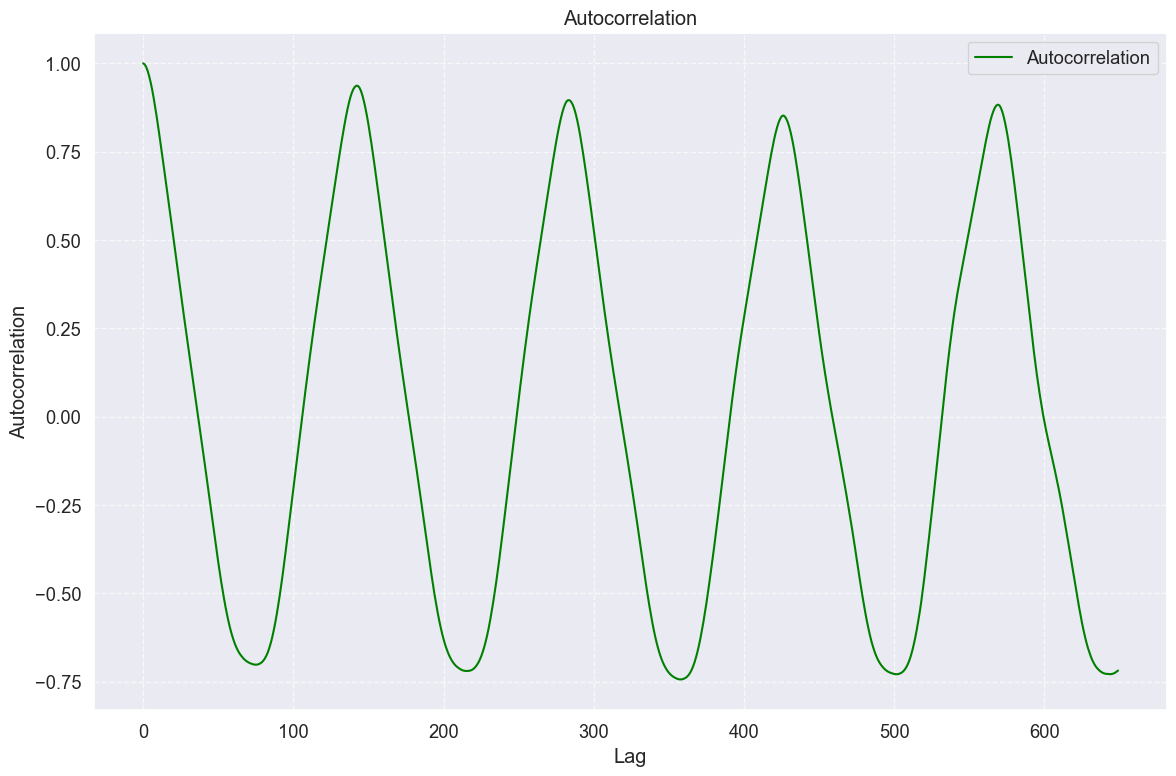

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all batches into one dataset
ac = dftw['DO'].copy()

# Set the maximum lag
max_lag = 650

# Calculate autocorrelation for the combined dataset
autocorr = [ac.autocorr(lag=l) for l in range(max_lag)]

# Plot the autocorrelation for the combined dataset
plt.figure(figsize=(12, 8))
plt.plot(np.arange(max_lag), autocorr, label='Autocorrelation', color='green')

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\morebo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2614
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0427
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0101
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 9/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016    
Epoch 10/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014
Epoch 11/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018
Epoch 12/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014    
Epoch 13/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 0.44
Mean Absolute Error (MAE): 0.42
Root Mean Squared Error (RMSE): 0.66
R-s

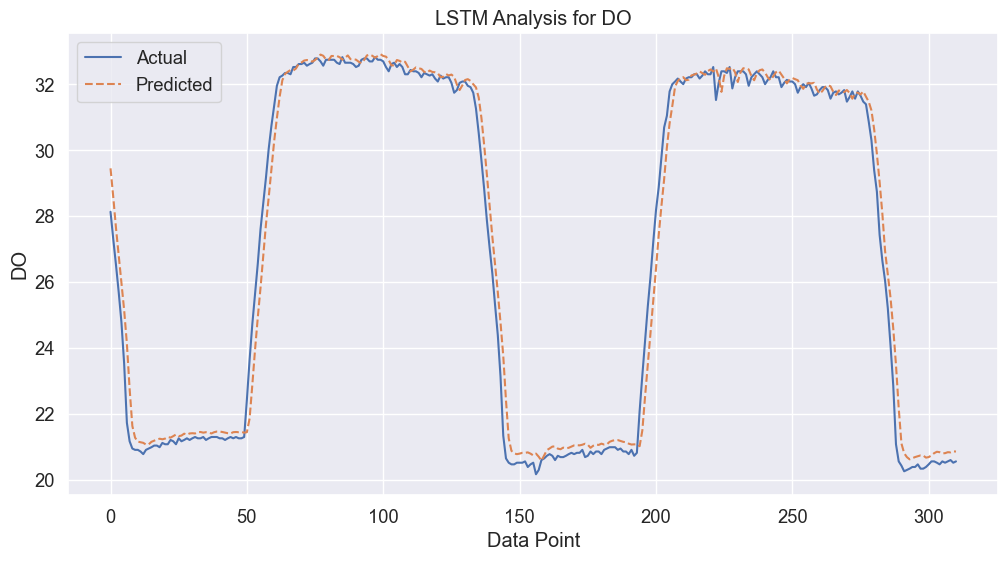

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming dftw is your dataset and 'DO' is the feature you want to predict
data = dftw[['DO']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 2

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=20, input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=13, batch_size=8)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.title('LSTM Analysis for DO')
plt.xlabel('Data Point')
plt.ylabel('DO')
plt.legend()
plt.show()


Epoch 1/50


C:\Users\morebo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2834 - val_loss: 0.0477
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0530 - val_loss: 0.0626
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0392 - val_loss: 0.0378
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0312 - val_loss: 0.0353
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0263 - val_loss: 0.0337
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0250 - val_loss: 0.0326
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0201 - val_loss: 0.0320
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0230 - val_loss: 0.0313
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0200 - val_loss: 0.0305
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0224 - val_loss: 0.0299
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0185 - val_loss: 0.0294
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0204 - val_l

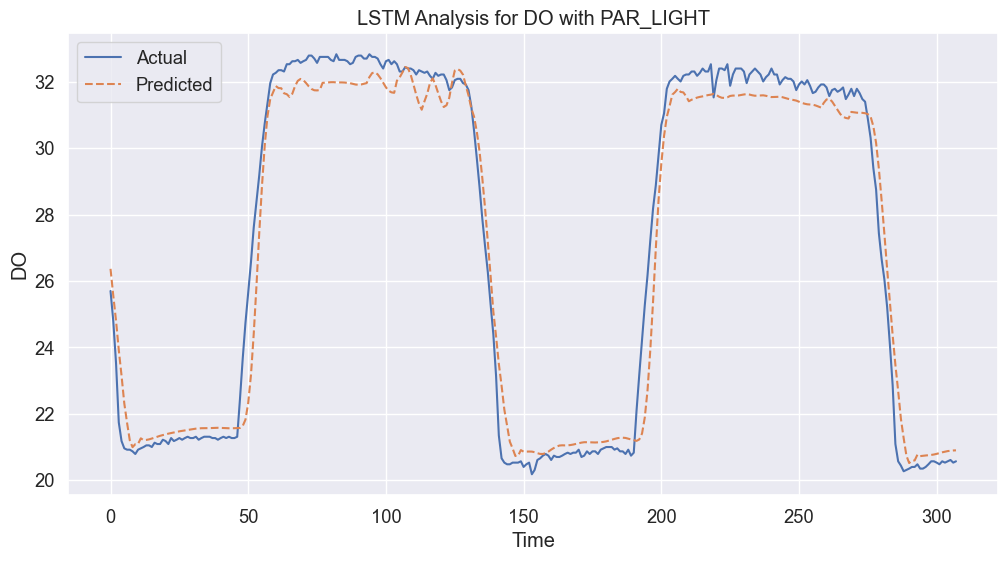

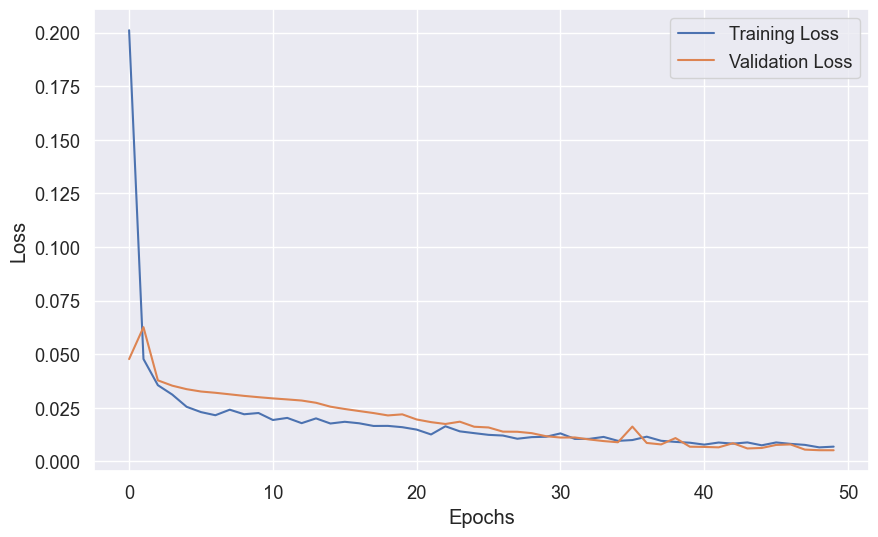

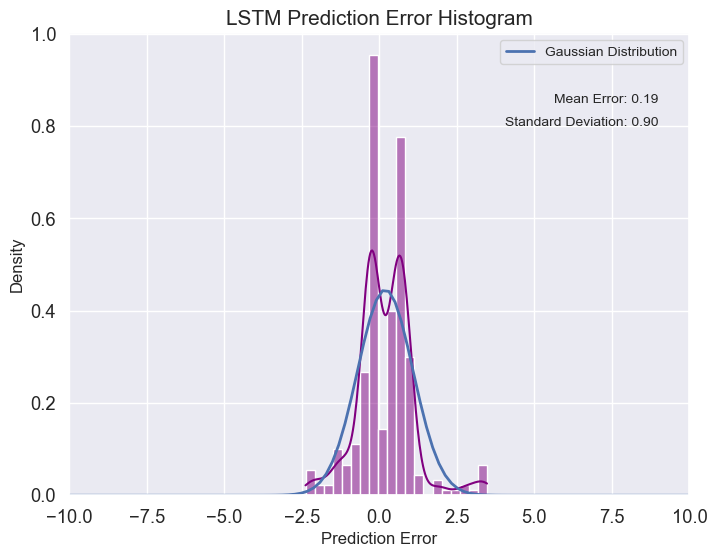

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.stats import norm
import seaborn as sns

# Assuming dftw is your dataset
# Extract the relevant features
data = dftw[['PAR_LIGHT', 'DO']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create time series data with lookback
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), :])  # Features from all columns
        y.append(dataset[i + look_back, 1])  # Target 'DO'
    return np.array(X), np.array(y)

# Define the lookback window
look_back = 10

# Create the time series dataset
X, y = create_dataset(data_scaled, look_back)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split the data into training and testing sets
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model with added complexity and regularization
model = Sequential()
model.add(LSTM(units=32, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Make predictions on the test set
y_pred = model.predict(X_test).reshape(-1)

# Inverse transform the predictions
y_pred_2d = np.zeros(shape=(y_pred.shape[0], 2))
y_pred_2d[:, 1] = y_pred.copy()
y_pred = scaler.inverse_transform(y_pred_2d)[:, 1]

y_test_2d = np.zeros(shape=(y_test.shape[0], 2))
y_test_2d[:, 1] = y_test.copy()
y_test = scaler.inverse_transform(y_test_2d)[:, 1]

# Quantitative Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='dashed')
plt.title('LSTM Analysis for DO with PAR_LIGHT')
plt.xlabel('Time')
plt.ylabel('DO')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate prediction error
error_lstm = y_test.flatten() - y_pred.flatten()

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(error_lstm, bins=20, kde=True, color='purple', stat='density')

# Calculate mean and standard deviation of the error
mean_error_lstm = np.mean(error_lstm)
std_error_lstm = np.std(error_lstm)

# Generate values for Gaussian curve
x = np.linspace(-10, 10, 100)
pdf = norm.pdf(x, mean_error_lstm, std_error_lstm)  # Gaussian distribution

# Plot Gaussian distribution curve
plt.plot(x, pdf, 'b-', linewidth=2, label='Gaussian Distribution')

# Annotate with mean and standard deviation
plt.text(0.95, 0.85, f'Mean Error: {mean_error_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)
plt.text(0.95, 0.80, f'Standard Deviation: {std_error_lstm:.2f}', fontsize=10, ha='right', transform=plt.gca().transAxes)

plt.xlim(-10, 10)  # Set x-axis limit from -10 to 10
plt.title('LSTM Prediction Error Histogram', fontsize=15)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()


Relative Squared Error (RSE): 0.08
Mean Squared Error (MSE): 4.94
R-squared (R2): 0.79
Mean Absolute Error (MAE): 1.63
MAPE: 5.99


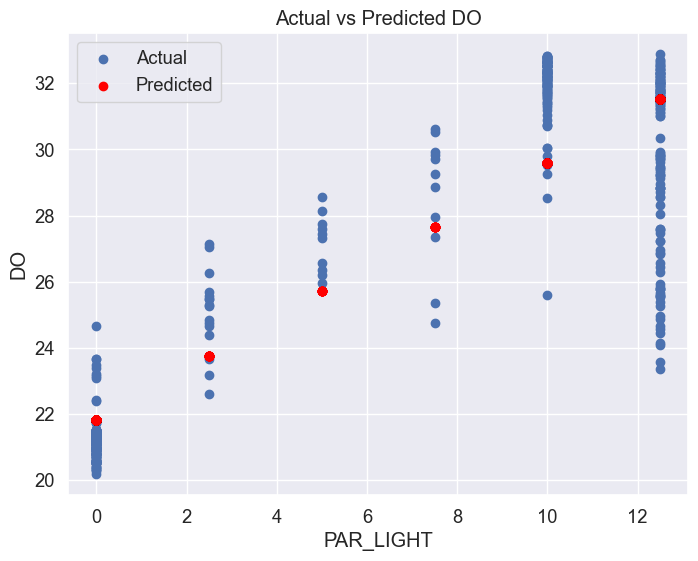

In [20]:
#Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Extract 'PAR_LIGHT' and 'DO' columns
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for Linear Regression
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Initialize the Linear Regression model
lin_regressor = LinearRegression()

# Train the model
lin_regressor.fit(X_train, y_train)

# Predict on the test set
predicted_DO_test = lin_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_DO_test)
r2 = r2_score(y_test, predicted_DO_test)
mae = mean_absolute_error(y_test, predicted_DO_test)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - predicted_DO_test) / y_test)) * 100

# Print evaluation metrics
print(f'Relative Squared Error (RSE): {rse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predicted_DO_test, color='red', label='Predicted')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\morebo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 669.7229 - val_loss: 603.8624
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 593.8498 - val_loss: 540.4742
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 532.0105 - val_loss: 471.3427
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 454.6620 - val_loss: 399.1057
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 382.5277 - val_loss: 331.4666
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 310.3017 - val_loss: 271.7368
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 249.9460 - val_loss: 225.6696
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 206.3067 - val_loss: 196.1267
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 184.4280 - val_loss: 181.6857
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 176.5756 - val_loss: 176.9235
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 163.4397 - val_loss: 175.0208
Epoch 12/100
10/10 ━━━━━━━━━━━

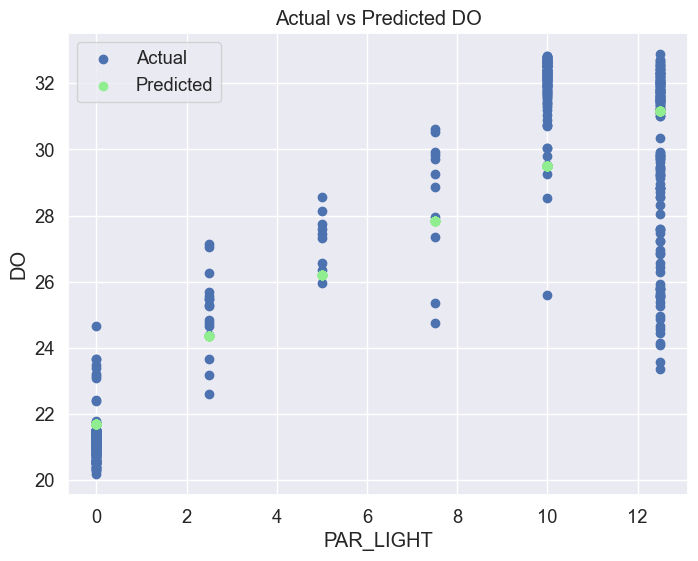

In [21]:
# Neural Network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Extract 'PAR_LIGHT' and 'DO' columns
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for Keras
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # 64 neurons in the first hidden layer
model.add(Dense(32, activation='relu'))  # 32 neurons in the second hidden layer
model.add(Dense(1))  # Output layer with 1 neuron (for regression)
model.compile(loss='mean_squared_error', optimizer='adam')  # Compile the model

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Predict on the test set
predicted_DO_test = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_DO_test)
r2 = r2_score(y_test, predicted_DO_test)
mae = mean_absolute_error(y_test, predicted_DO_test)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - predicted_DO_test) / y_test)) * 100

# Print evaluation metrics
print(f'Relative Squared Error (RSE): {rse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predicted_DO_test, color='lightgreen', label='Predicted')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO')
plt.legend()
plt.show()


Relative Squared Error (RSE): 0.06
Mean Squared Error (MSE): 2.38
R-squared (R2): 0.90
Mean Absolute Error (MAE): 0.96
MAPE: 20.64


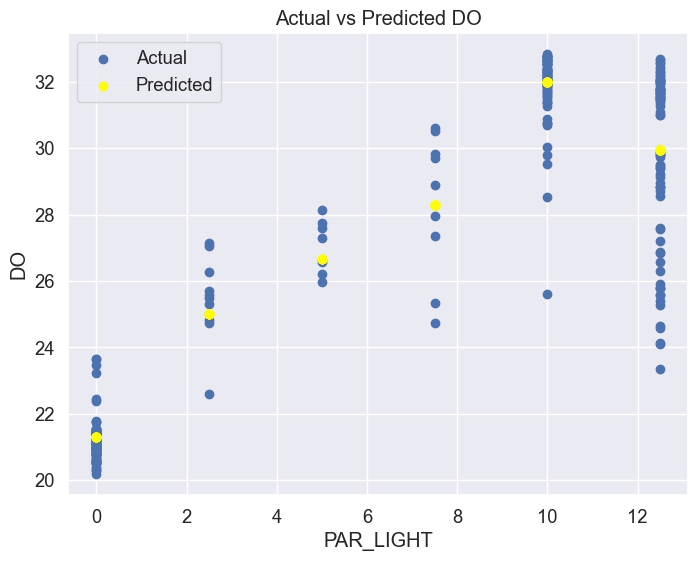

In [22]:
#DTR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Extract 'PAR_LIGHT' and 'DO' columns
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for DecisionTreeRegressor
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the test set
predicted_DO_test = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_DO_test)
r2 = r2_score(y_test, predicted_DO_test)
mae = mean_absolute_error(y_test, predicted_DO_test)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - predicted_DO_test) / y_test)) * 100

# Print evaluation metrics
print(f'Relative Squared Error (RSE): {rse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'MAPE: {mape:.2f}')

# Plot actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predicted_DO_test, color='yellow', label='Predicted')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO')
plt.legend()
plt.show()



Relative Squared Error (RSE): 0.08
MAPE: 20.78
Mean Squared Error (MSE): 4.84
R-squared (R2): 0.80
Mean Absolute Error (MAE): 1.42


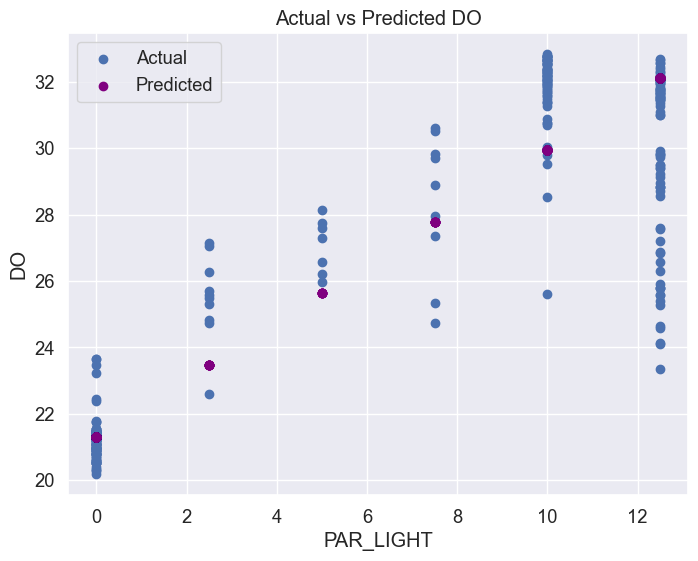

In [24]:
#SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Extract 'PAR_LIGHT' and 'DO' columns
PAR_data = dftw['PAR_LIGHT']
DO_data = dftw['DO']

# Reshape the data for SVR
X = PAR_data.values.reshape(-1, 1)
y = DO_data.values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the SVR model
svr = SVR(kernel='linear')

# Train the model
svr.fit(X_train, y_train.ravel())  # ravel() is used to flatten y_train

# Predict on the test set
predicted_DO_test = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predicted_DO_test)
r2 = r2_score(y_test, predicted_DO_test)
mae = mean_absolute_error(y_test, predicted_DO_test)
rse = np.sqrt(mse) / np.mean(y_test)
mape = np.mean(np.abs((y_test - predicted_DO_test) / y_test)) * 100

# Print evaluation metrics
print(f'Relative Squared Error (RSE): {rse:.2f}')
print(f'MAPE: {mape:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Plot actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predicted_DO_test, color='purple', label='Predicted')
plt.xlabel('PAR_LIGHT')
plt.ylabel('DO')
plt.title('Actual vs Predicted DO')
plt.legend()
plt.show()

